In [3]:
pip install seaborn

In [4]:
import seaborn as sns
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

In [8]:
class Agent:
    # Attributes
    def __init__(self, x, y, initial_wealth):
        # Coordinate of the agents
        self.x = x  
        self.y = y  
        self.wealth = initial_wealth

    # class method

    """ Transaction between themselves and other agents """
    def transact(self, other):
        if self.wealth > 0:
            exchange_amt = 1
            # exchange_amt = round(random.normalvariate(0,1),1)
            self.wealth -= exchange_amt
            other.wealth += exchange_amt

    """get neighbours"""
    def get_neighbours(self,agents):
        neighbours = []
        for others in agents:
            # L2 norm
            if others != self and np.linalg.norm([others.x - self.x, others.y - self.y]) <= 1:
                neighbours.append(others)
        return neighbours
    
    """ movement (in physical space, random) """
    def movement(self,vel,dt,width,height):
        r = vel * dt
        theta = random.uniform(0,2 * np.pi)
        self.x = (self.x + r * np.cos(theta)) % width
        self.y = (self.y + r * np.sin(theta)) % height

# define model class
class BoltzmannWealthModel:
    def __init__(self, width, height, num_agents, initial_wealth):
        self.width = width  
        self.height = height  
        self.agents = [Agent(random.uniform(0, width), \
            random.uniform(0, height), initial_wealth) for _ in range(num_agents)]

    def step(self):
        """ model one transaction"""
        for agent in self.agents:
            # choose a neighbour randomly
            neighbours = agent.get_neighbours(self.agents)
            if neighbours:
                other = random.choice(neighbours)
                agent.transact(other)


    
    def data_collection(self):
        wealths = [agent.wealth for agent in self.agents]
        return wealths

    def visualize(self):
        """Visualization"""
        x_positions = [agent.x for agent in self.agents]
        y_positions = [agent.y for agent in self.agents]
        wealths = [agent.wealth for agent in self.agents]

        plt.figure(figsize=(5, 5))
        plt.scatter(x_positions, y_positions, c=wealths, cmap="viridis", s=50, alpha=0.6)
        plt.colorbar(label="Wealth")
        plt.title("Wealth Distribution")
        plt.xlabel("X")
        plt.ylabel("Y")
        plt.grid(True)
        plt.show()


width, height = 10, 10  
num_agents = 500  
initial_wealth = 100  

model = BoltzmannWealthModel(width, height, num_agents, initial_wealth)


steps = 100
for _ in range(steps):
    model.step()


wealth_data = model.data_collection()

c:\Users\yumog\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

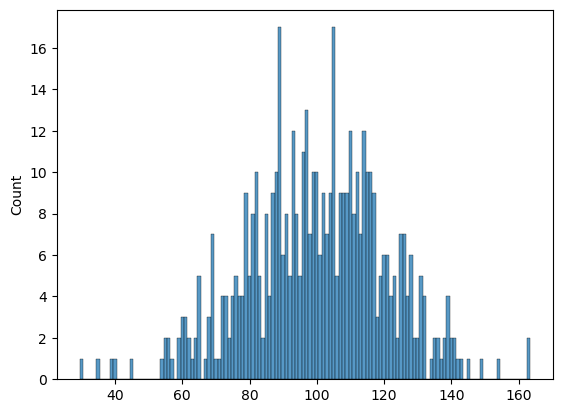

In [9]:
sns.histplot(wealth_data, discrete=True)

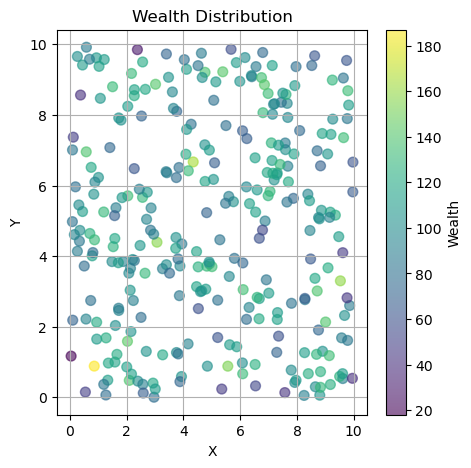

In [7]:
model.visualize()